# Instalacja pakietów



In [ ]:
!pip install pysal

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 k

In [ ]:
# 1. Importowanie bibliotek

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pysal.lib
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import moran_scatterplot

/usr/local/lib/python3.10/dist-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


# Analiza całej Polski


In [ ]:
powiaty = gpd.read_file("powiaty.shp")
danePow = pd.read_csv("powiaty1.csv")


In [ ]:
powiaty['JPT_NAZWA_'] = powiaty['JPT_NAZWA_'].str.replace('powiat ', '', regex=False)

In [ ]:

powiaty['powiat'] = powiaty['JPT_NAZWA_'].str.strip().str.lower()  # Kolumna z nazwami powiatow w shapefile
danePow['powiat'] = danePow['powiat'].str.strip().str.lower()    # Kolumna z CSV
powiaty2 = powiaty.merge(danePow, on='powiat')

powiaty2.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,powiat,oid,kod KTS,powierzchnia,rok,TERYT,Typ powiatu,TERYT województwa,Województwo,Odpady zebrane w ciągu roku|ogółem w tys. ton
0,None,POW,92617,1807,krośnieński,None,13415,20210128,0,20170101,...,krośnieński,17,20811402000,1390.0,2022,802,powiat,8,lubuskie,19.43
1,None,POW,92617,1807,krośnieński,None,13415,20210128,0,20170101,...,krośnieński,93,61813307000,992.0,2022,1807,powiat,18,podkarpackie,19.10
2,None,POW,141297,2804,elbląski,None,13422,20210514,0,20120926,...,elbląski,311,42815404000,1413.0,2022,2804,powiat,28,warmińsko-mazurskie,16.91
3,None,POW,209827,1415,ostrołęcki,None,13409,20210518,0,20120926,...,ostrołęcki,111,71422615000,2093.0,2022,1415,powiat,14,mazowieckie,20.77
4,None,POW,79097,0413,sępoleński,None,13424,20220112,0,20120926,...,sępoleński,298,40416813000,791.0,2022,413,powiat,4,kujawsko-pomorskie,10.93


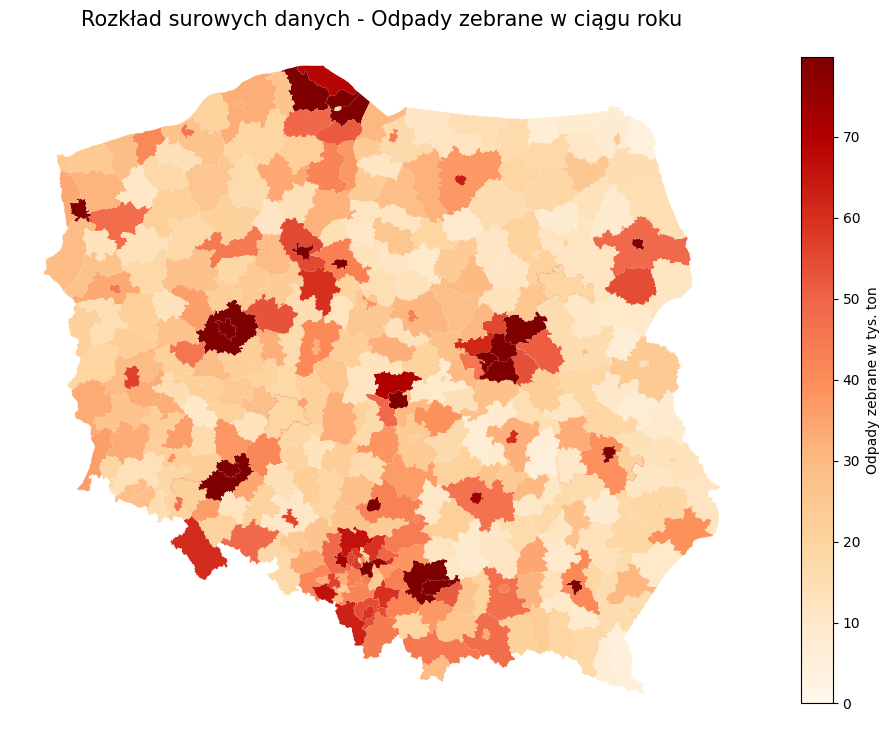

In [ ]:
# Wizualizacja rozkładu surowych danych
fig, ax = plt.subplots(1, 1, figsize=(12, 12))  # Zwiększenie rozmiaru wykresu

# Użycie skalowanego zakresu kolorów z większą rozpiętością wartości, aby lepiej uwidocznić różnice
powiaty2.plot(
    column='Odpady zebrane w ciągu roku|ogółem w tys. ton',
    cmap='OrRd',
    legend=True,
    ax=ax,
    vmin=0,
    vmax=powiaty2['Odpady zebrane w ciągu roku|ogółem w tys. ton'].quantile(0.95),  # Ustawienie górnej granicy na 95. percentylu, by uwydatnić różnice
    legend_kwds={
        'label': "Odpady zebrane w tys. ton",
        'orientation': "vertical",
        'shrink': 0.7
    }
)

# Dostosowanie tytułu i wyłączenie osi
ax.set_title('Rozkład surowych danych - Odpady zebrane w ciągu roku', fontsize=15)
ax.axis('off')  # Ukrycie osi dla lepszej czytelności

plt.show()


In [ ]:
# 3. Tworzenie macierzy wag przestrzennych
w = weights.Queen.from_dataframe(powiaty2)
w.transform = 'R'  # Normalizacja macierzy wag


<ipython-input-39-8ff57aa576e3>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(powiaty2)


In [ ]:
# 4. Wyodrębnienie wartości zmiennej
y = powiaty2['Odpady zebrane w ciągu roku|ogółem w tys. ton'].values


In [ ]:
# 5. Obliczenie wskaźnika Morana
moran = esda.Moran(y, w)

print('Wskaźnik Morana I:', moran.I)
print('Statystyka z:', moran.z_norm)
print('p-value:', moran.p_norm)


Wskaźnik Morana I: 0.1584110735430431
Statystyka z: 5.0181589874265775
p-value: 5.216899619493166e-07


In [ ]:
# 6. Obliczenie wskaźnika Geary'ego
geary = esda.Geary(y, w)

print('Wskaźnik Geary\'ego C:', geary.C)
print('Statystyka z:', geary.z_norm)
print('p-value:', geary.p_norm)

Wskaźnik Geary'ego C: 0.8207333833562215
Statystyka z: -4.840989529839715
p-value: 6.459709013444091e-07


In [ ]:
# 7. Obliczenie statystyki Getisa i Orda G
G = esda.G(y, w)

print('Statystyka G Getisa i Orda:', G.G)
print('Statystyka z:', G.z_norm)
print('p-value:', G.p_norm)

Statystyka G Getisa i Orda: 0.017834711047160508
Statystyka z: 3.1037387829848933
p-value: 0.0009554598223573407


In [ ]:
# Obliczenie lokalnego wskaźnika Morana
lm = esda.Moran_Local(y, w)

# Dodanie wyników do GeoDataFrame
powiaty2['local_moran'] = lm.Is

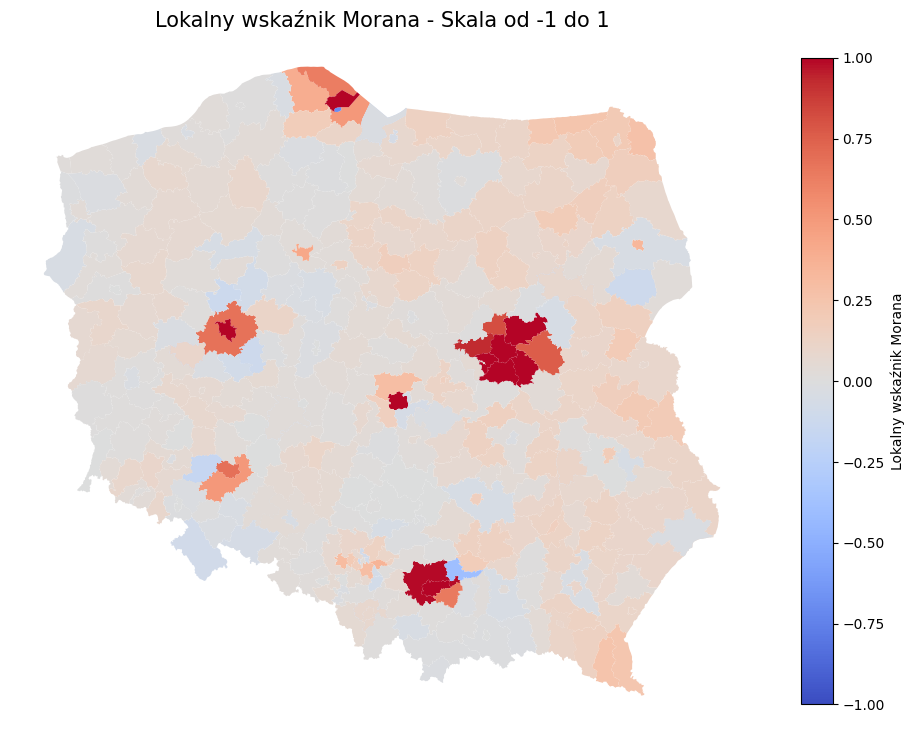

In [ ]:
# Wizualizacja - skala od -1 do 1
fig, ax = plt.subplots(1, 1, figsize=(12, 12))  # Zwiększenie rozmiaru wykresu

# Ustawienie zakresu kolorów od -1 do 1
powiaty2.plot(column='local_moran', cmap='coolwarm', legend=True, ax=ax,
             vmin=-1, vmax=1,
             legend_kwds={'label': "Lokalny wskaźnik Morana",
                          'orientation': "vertical",
                          'shrink': 0.7})  # Ustawienie legendy

# Dostosowanie tytułu i wyłączenie osi
ax.set_title('Lokalny wskaźnik Morana - Skala od -1 do 1', fontsize=15)
ax.axis('off')  # Ukrycie osi dla lepszej czytelności

plt.show()

In [ ]:
# Obliczenie wskaźnika Morana I z permutacjami
moran_perm = esda.Moran(y, w, permutations=999)

print('Wskaźnik Morana I:', moran_perm.I)
print('p-value (permutacje):', moran_perm.p_sim)
print('Z-score (permutacje):', moran_perm.z_sim)

Wskaźnik Morana I: 0.1584110735430431
p-value (permutacje): 0.002
Z-score (permutacje): 6.155142722767706


In [ ]:
# Geary's C z permutacjami
geary_perm = esda.Geary(y, w, permutations=999)
print('Wskaźnik Geary\'ego C:', geary_perm.C)
print('p-value (permutacje):', geary_perm.p_sim)

Wskaźnik Geary'ego C: 0.8207333833562215
p-value (permutacje): 0.101


In [ ]:
# Getis and Ord's G z permutacjami
G_perm = esda.G(y, w, permutations=999)
print('Statystyka G Getisa i Orda:', G_perm.G)
print('p-value (permutacje):', G_perm.p_sim)

Statystyka G Getisa i Orda: 0.017834711047160508
p-value (permutacje): 0.013


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:131: UserWarning: `p` is only used for plotting `esda.moran.Moran_Local`
or `Moran_Local_BV` objects
  warnings.warn(


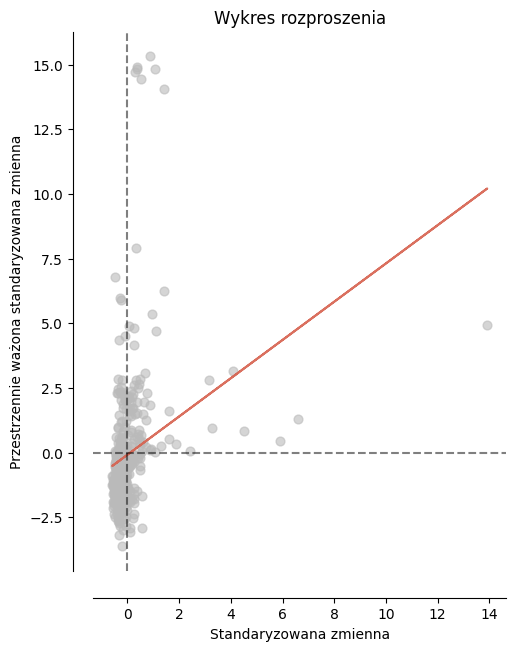

In [ ]:
# Standaryzacja zmiennej
y_std = (y - y.mean()) / y.std()

# Wykres rozproszenia
fig, ax = moran_scatterplot(moran_perm, p=0.05)
ax.set_xlabel('Standaryzowana zmienna')
ax.set_ylabel('Przestrzennie ważona standaryzowana zmienna')
plt.title('Wykres rozproszenia')
plt.show()

/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 120 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


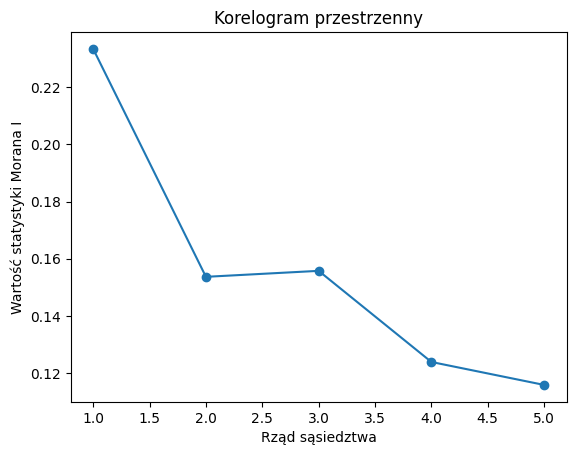

In [ ]:
# Tworzenie macierzy wag opartych na odległości
max_dist = 50000  # Maksymalna odległość (w metrach)
w_dist = weights.DistanceBand.from_dataframe(powiaty2, threshold=max_dist, binary=True)

# Obliczenie autokorelacji dla różnych odległości
lags = range(1, 6)
moran_stats = []

for lag in lags:
    w_lag = weights.KNN.from_dataframe(powiaty2, k=lag)
    w_lag.transform = 'R'
    moran_lag = esda.Moran(y, w_lag, permutations=999)
    moran_stats.append(moran_lag.I)

# Wykres korelogramu
plt.plot(lags, moran_stats, marker='o')
plt.title('Korelogram przestrzenny')
plt.xlabel('Rząd sąsiedztwa')
plt.ylabel('Wartość statystyki Morana I')
plt.show()


In [ ]:
# Macierz sąsiedztwa Rook
w_rook = weights.Rook.from_dataframe(powiaty2)
w_rook.transform = 'R'


<ipython-input-51-846968023297>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_rook = weights.Rook.from_dataframe(powiaty2)


In [ ]:
# Macierz odległości z progiem
max_distance = 50000  # 50 km
w_distance = weights.DistanceBand.from_dataframe(powiaty2, threshold=max_distance)
w_distance.transform = 'R'


In [ ]:
# Macierz kNN z k=4
w_knn = weights.KNN.from_dataframe(powiaty2, k=4)
w_knn.transform = 'R'


In [ ]:
weights_list_powiat = [
    (w, 'Macierz wag przestrzennych Queen'),
    (w_rook, 'Rook'),
    (w_distance, 'Macierz odleglosci z progiem'),
    (w_knn, 'Macierz KNN (k=4)')
]


In [ ]:
# Lista macierzy wag i ich nazw
weights_list = [(w, 'Macierz wag przestrzennych Queen'), (w_rook, 'Rook'), (w_distance, 'Macierz odleglosci z progiem'), (w_knn, 'Macierz KNN (k=4)')]

# Analiza statystyk dla każdej macierzy wag
results_poland = []

for w_matrix, name in weights_list:
    w_matrix.transform = 'R'
    # Moran I
    moran = esda.Moran(y, w_matrix, permutations=999)
    # Geary's C
    geary = esda.Geary(y, w_matrix, permutations=999)
    # Getis-Ord G
    G_stat = esda.G(y, w_matrix, permutations=999)

    # Zbieranie wyników do tabeli
    results_poland.append({
        'Macierz wag': name,
        'Moran I': moran.I,
        'Moran p-value': moran.p_sim,
        'Geary C': geary.C,
        'Geary p-value': geary.p_sim,
        'Getis-Ord G': G_stat.G,
        'Getis-Ord p-value': G_stat.p_sim
    })

# Wyświetlenie wyników w formie tabeli
results_df_poland = pd.DataFrame(results_poland)
display(results_df_poland)


,Macierz wag,Moran I,Moran p-value,Geary C,Geary p-value,Getis-Ord G,Getis-Ord p-value
0,Macierz wag przestrzennych Queen,0.158411,0.001,0.820733,0.087,0.017835,0.012
1,Rook,0.158411,0.003,0.820733,0.084,0.017835,0.011
2,Macierz odleglosci z progiem,0.055788,0.015,1.010966,0.404,0.035076,0.005
3,Macierz KNN (k=4),0.123869,0.007,0.847498,0.043,0.012619,0.012


# Analiza wybranych wojewodztw

In [ ]:
# Symulacja danych na podstawie df.info() i df.head()
powiaty = gpd.read_file("powiaty.shp")  # Wczytanie danych przestrzennych
danePow = pd.read_csv("powiaty1.csv")  # Wczytanie danych atrybutowych


In [ ]:
# Przygotowanie kolumn do analizy
danePow['powiat'] = danePow['powiat'].str.strip().str.lower()  # Standaryzacja nazw
powiaty['JPT_NAZWA_'] = powiaty['JPT_NAZWA_'].str.replace('powiat ', '', regex=False)
powiaty['powiat'] = powiaty['JPT_NAZWA_'].str.strip().str.lower()

# Połączenie danych przestrzennych z atrybutowymi
powiaty2 = powiaty.merge(danePow, on='powiat')

In [ ]:
def analiza_wojewodztwa_z_tabela(powiaty, nazwa_wojewodztwa):
    results = []

    # Przygotowanie macierzy wag
    macierze_wag = {
        "Macierz wag przestrzennych Queen": weights.Queen.from_dataframe(powiaty),
        "Macierz wag przestrzennych Rook": weights.Rook.from_dataframe(powiaty),
        "Macierz odległości z progiem": weights.DistanceBand.from_dataframe(powiaty, threshold=50_000, binary=True),
        "Macierz KNN (k=4)": weights.KNN.from_dataframe(powiaty, k=4)
    }

    # Analiza dla każdej macierzy
    for nazwa_macierzy, w in macierze_wag.items():
        w.transform = 'R'
        y = powiaty['Odpady zebrane w ciągu roku|ogółem w tys. ton'].values

        # Moran I
        moran = esda.Moran(y, w, permutations=999)
        # Geary's C
        geary = esda.Geary(y, w, permutations=999)
        # Getis-Ord G
        G_stat = esda.G(y, w, permutations=999)

        # Zbieranie wyników do tabeli
        results.append({
            'Macierz wag': nazwa_macierzy,
            'Moran I': moran.I,
            'Moran p-value': moran.p_sim,
            'Geary C': geary.C,
            'Geary p-value': geary.p_sim,
            'Getis-Ord G': G_stat.G,
            'Getis-Ord p-value': G_stat.p_sim
        })

    # Wyświetlenie wyników w formie tabeli
    results_df = pd.DataFrame(results)
    display(results_df)

    return results_df


In [ ]:
def analiza_dla_wojewodztwa(powiaty, nazwa_wojewodztwa):
    # Wizualizacja rozkładu danych
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    powiaty.plot(
        column='Odpady zebrane w ciągu roku|ogółem w tys. ton',
        cmap='OrRd',
        legend=True,
        ax=ax,
        vmin=0,
        vmax=powiaty['Odpady zebrane w ciągu roku|ogółem w tys. ton'].quantile(0.95),
        legend_kwds={
            'label': "Odpady zebrane w tys. ton",
            'orientation': "vertical",
            'shrink': 0.7
        }
    )
    ax.set_title(f'Rozkład surowych danych - {nazwa_wojewodztwa}', fontsize=15)
    ax.axis('off')
    plt.show()

    # Lista macierzy wag i ich nazw
    macierze_wag = {
        "Macierz wag przestrzennych Queen": weights.Queen.from_dataframe(powiaty),
        "Macierz wag przestrzennych Rook": weights.Rook.from_dataframe(powiaty),
        "Macierz odległości z progiem": weights.DistanceBand.from_dataframe(powiaty, threshold=50_000, binary=True),
        "Macierz KNN (k=4)": weights.KNN.from_dataframe(powiaty, k=4)
    }

    # Obliczenie wskaźnika Morana I dla każdej macierzy wag
    for nazwa_macierzy, w in macierze_wag.items():
        w.transform = 'R'
        y = powiaty['Odpady zebrane w ciągu roku|ogółem w tys. ton'].values
        moran = esda.Moran(y, w, permutations=999)

        print("---------------------------------------")
        print(f"Macierz wag: {nazwa_macierzy}")
        print(f"  Wskaźnik Morana I: {moran.I:.4f}")
        print(f"  p-value (permutacje): {moran.p_sim:.4f}")
        print("---------------------------------------")

    # Wykorzystanie macierzy Queen do dalszych analiz
    w = macierze_wag["Macierz wag przestrzennych Queen"]
    print("\n\n Dalsza analiza dla macierzy Queen")
    # Wyodrębnienie zmiennej y
    y = powiaty['Odpady zebrane w ciągu roku|ogółem w tys. ton'].values

    # Obliczenie wskaźnika Geary'ego
    geary = esda.Geary(y, w)
    print("\nWskaźnik Geary'ego C:", geary.C)
    print('Statystyka z:', geary.z_norm)
    print('p-value:', geary.p_norm)

    # Obliczenie statystyki Getisa i Orda G
    G_stat = esda.G(y, w)
    print("\nStatystyka G Getisa i Orda:", G_stat.G)
    print('Statystyka z:', G_stat.z_norm)
    print('p-value:', G_stat.p_norm)
    print("\n---------------------------------------\n\n\n")

    # Obliczenie lokalnego wskaźnika Morana
    lm = esda.Moran_Local(y, w)
    powiaty['local_moran'] = lm.Is

    # Wizualizacja lokalnego wskaźnika Morana
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    powiaty.plot(column='local_moran', cmap='coolwarm', legend=True, ax=ax,
                 vmin=-1, vmax=1,
                 legend_kwds={'label': "Lokalny wskaźnik Morana",
                              'orientation': "vertical",
                              'shrink': 0.7})
    ax.set_title(f'Lokalny wskaźnik Morana - {nazwa_wojewodztwa}', fontsize=15)
    ax.axis('off')
    plt.show()

    # Korelogram przestrzenny
    lags = range(1, 6)
    moran_stats = []
    for lag in lags:
        w_lag = weights.KNN.from_dataframe(powiaty, k=lag)
        w_lag.transform = 'R'
        moran_lag = esda.Moran(y, w_lag, permutations=999)
        moran_stats.append(moran_lag.I)

    plt.plot(lags, moran_stats, marker='o')
    plt.title(f'Korelogram przestrzenny - {nazwa_wojewodztwa}')
    plt.xlabel('Rząd sąsiedztwa')
    plt.ylabel('Statystyka morana')
    plt.show()

    # Wykres rozproszenia Moran's I
    moran_perm = esda.Moran(y, w, permutations=999)
    fig, ax = moran_scatterplot(moran_perm, p=0.05)
    ax.set_xlabel('Standaryzowana zmienna')
    ax.set_ylabel('Przestrzennie ważona standaryzowana zmienna')
    plt.title(f'Wykres rozproszenia - {nazwa_wojewodztwa}')
    plt.show()

    # Zwracanie wyników
    return {'Moran': moran, 'Geary': geary, 'Getis_Ord': G_stat}


In [ ]:
# Filtracja województw
powiaty_zachodniopomorskie = powiaty2[powiaty2['Województwo'].str.lower() == 'zachodniopomorskie']
powiaty_warmińsko_mazurskie = powiaty2[powiaty2['Województwo'].str.lower() == 'warmińsko-mazurskie']
powiaty_kujawsko_pomorskie = powiaty2[powiaty2['Województwo'].str.lower() == 'kujawsko-pomorskie']
powiaty_swietokrzyskie = powiaty2[powiaty2['Województwo'].str.lower() == 'świętokrzyskie']

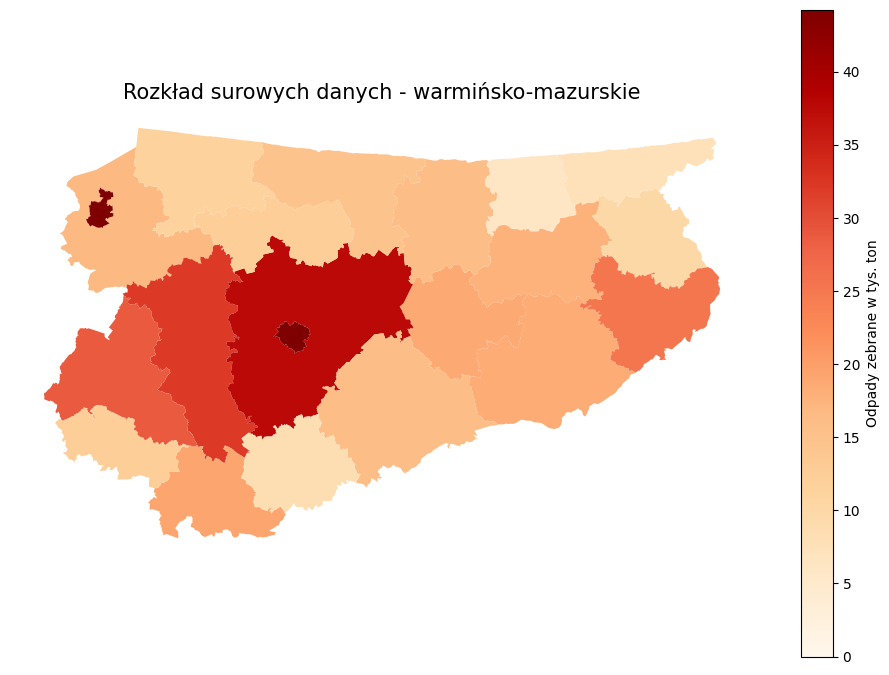

<ipython-input-59-0a49838f912f>:23: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  "Macierz wag przestrzennych Queen": weights.Queen.from_dataframe(powiaty),
<ipython-input-59-0a49838f912f>:24: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  "Macierz wag przestrzennych Rook": weights.Rook.from_dataframe(powiaty),


---------------------------------------
Macierz wag: Macierz wag przestrzennych Queen
  Wskaźnik Morana I: 0.2253
  p-value (permutacje): 0.0380
---------------------------------------
---------------------------------------
Macierz wag: Macierz wag przestrzennych Rook
  Wskaźnik Morana I: 0.2253
  p-value (permutacje): 0.0310
---------------------------------------
---------------------------------------
Macierz wag: Macierz odległości z progiem
  Wskaźnik Morana I: 0.0161
  p-value (permutacje): 0.2810
---------------------------------------
---------------------------------------
Macierz wag: Macierz KNN (k=4)
  Wskaźnik Morana I: 0.1179
  p-value (permutacje): 0.0900
---------------------------------------


 Dalsza analiza dla macierzy Queen

Wskaźnik Geary'ego C: 0.5237176524753757
Statystyka z: -2.89008554163506
p-value: 0.0019256850511333063

Statystyka G Getisa i Orda: 0.18909228119729865
Statystyka z: -0.23774010372074125
p-value: 0.4060413384986049

-------------------------

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


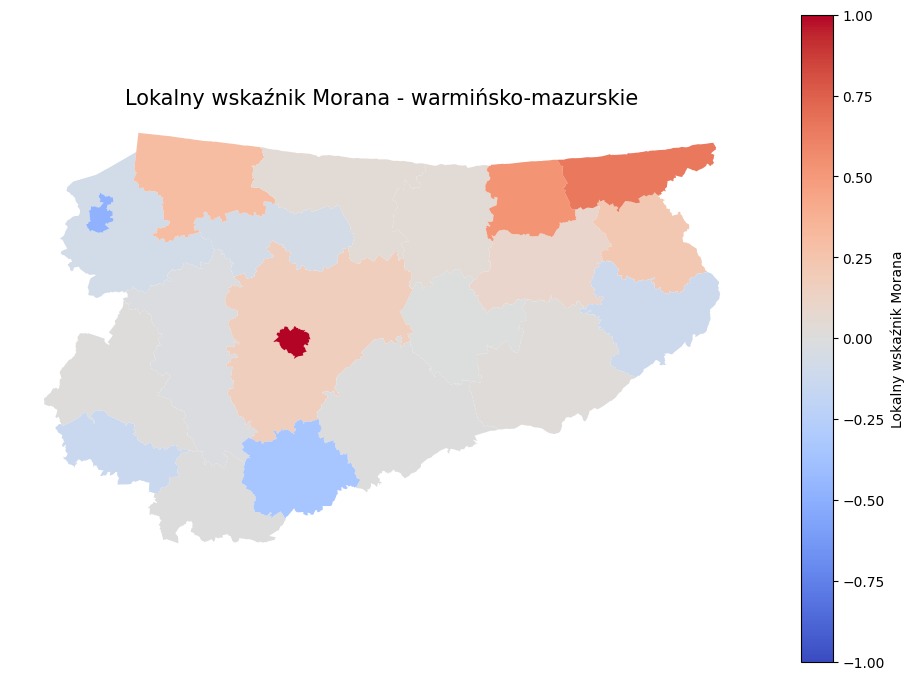

/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


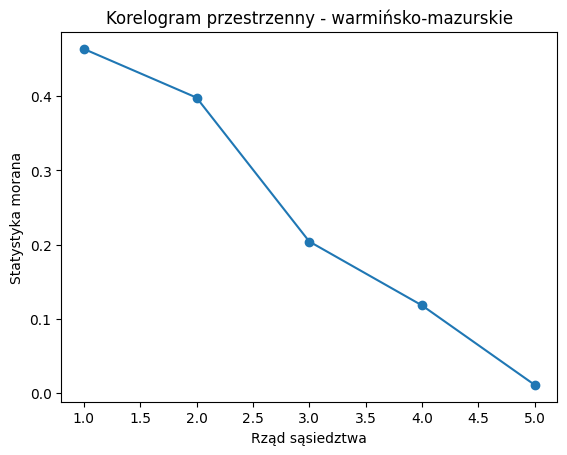

/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:131: UserWarning: `p` is only used for plotting `esda.moran.Moran_Local`
or `Moran_Local_BV` objects
  warnings.warn(


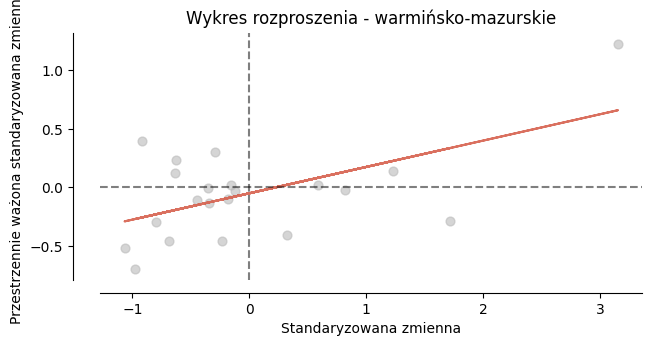

In [ ]:
analiza_wielkopolskie = analiza_dla_wojewodztwa(powiaty_warmińsko_mazurskie, "warmińsko-mazurskie")

In [ ]:
macierze_wielkopolskie = analiza_wojewodztwa_z_tabela(powiaty_warmińsko_mazurskie, "warmińsko-mazurskie")

<ipython-input-58-3f5bac77d132>:6: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  "Macierz wag przestrzennych Queen": weights.Queen.from_dataframe(powiaty),
<ipython-input-58-3f5bac77d132>:7: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  "Macierz wag przestrzennych Rook": weights.Rook.from_dataframe(powiaty),


,Macierz wag,Moran I,Moran p-value,Geary C,Geary p-value,Getis-Ord G,Getis-Ord p-value
0,Macierz wag przestrzennych Queen,0.225338,0.039,0.523718,0.006,0.189092,0.467
1,Macierz wag przestrzennych Rook,0.225338,0.039,0.523718,0.006,0.189092,0.430
2,Macierz odległości z progiem,0.016127,0.297,0.956880,0.371,0.199964,0.179
3,Macierz KNN (k=4),0.117914,0.090,0.879355,0.194,0.226826,0.032


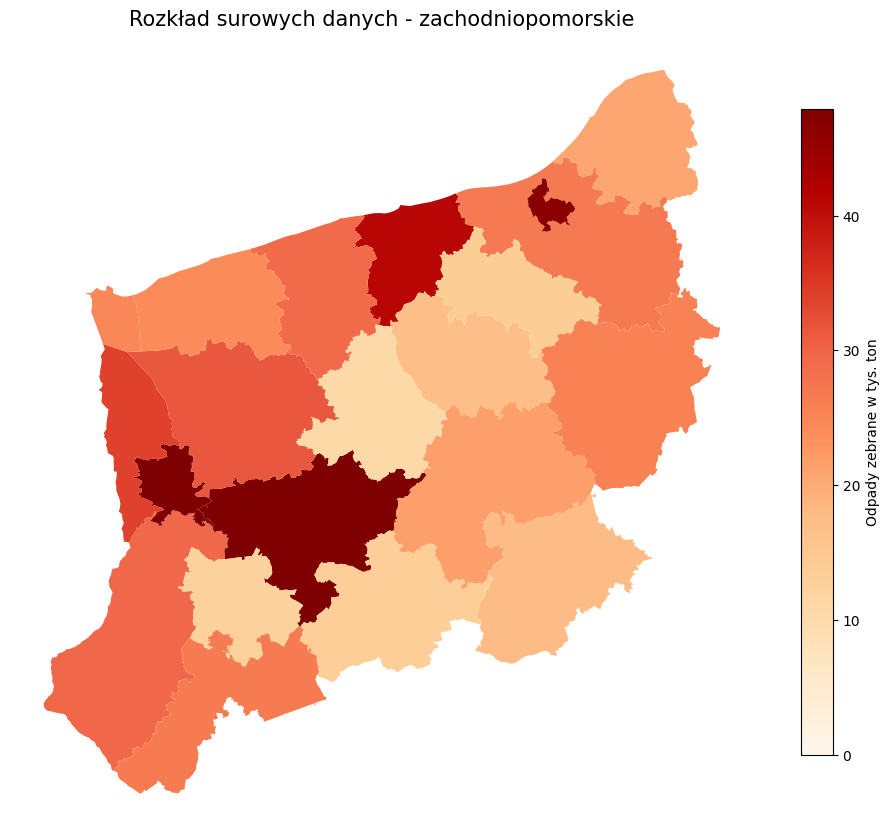

<ipython-input-59-0a49838f912f>:23: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  "Macierz wag przestrzennych Queen": weights.Queen.from_dataframe(powiaty),
<ipython-input-59-0a49838f912f>:24: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  "Macierz wag przestrzennych Rook": weights.Rook.from_dataframe(powiaty),


---------------------------------------
Macierz wag: Macierz wag przestrzennych Queen
  Wskaźnik Morana I: 0.0599
  p-value (permutacje): 0.0700
---------------------------------------
---------------------------------------
Macierz wag: Macierz wag przestrzennych Rook
  Wskaźnik Morana I: 0.0599
  p-value (permutacje): 0.0680
---------------------------------------
---------------------------------------
Macierz wag: Macierz odległości z progiem
  Wskaźnik Morana I: 0.0088
  p-value (permutacje): 0.1890
---------------------------------------
---------------------------------------
Macierz wag: Macierz KNN (k=4)
  Wskaźnik Morana I: -0.0245
  p-value (permutacje): 0.3400
---------------------------------------


 Dalsza analiza dla macierzy Queen

Wskaźnik Geary'ego C: 0.774231250476169
Statystyka z: -1.3979280588194083
p-value: 0.08106733588835041

Statystyka G Getisa i Orda: 0.23726297109457153
Statystyka z: 0.8192448762037392
p-value: 0.2063233579539654

---------------------------

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


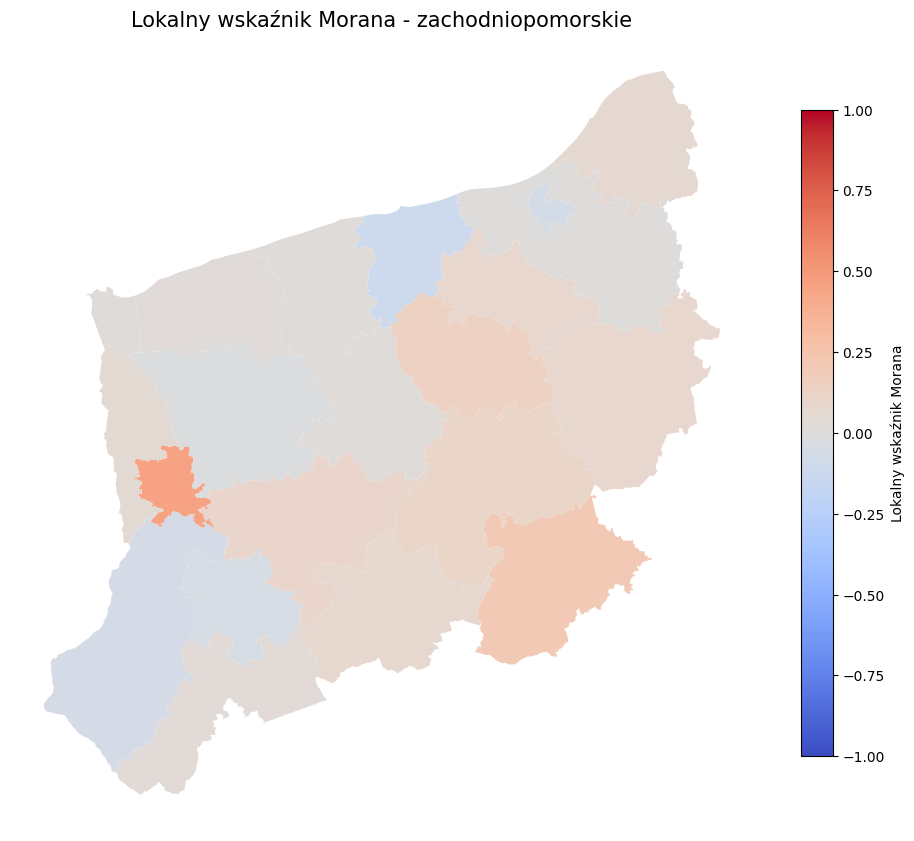

/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


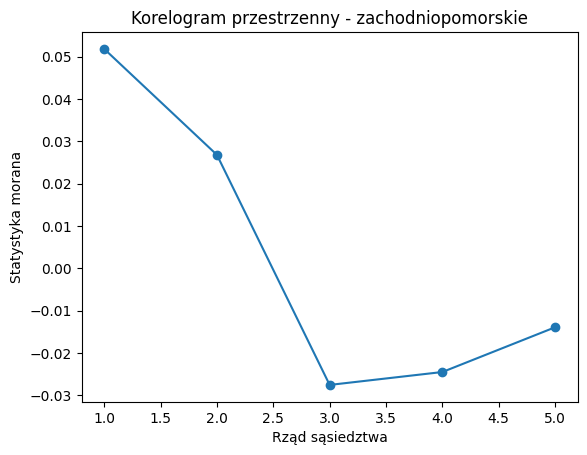

/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:131: UserWarning: `p` is only used for plotting `esda.moran.Moran_Local`
or `Moran_Local_BV` objects
  warnings.warn(


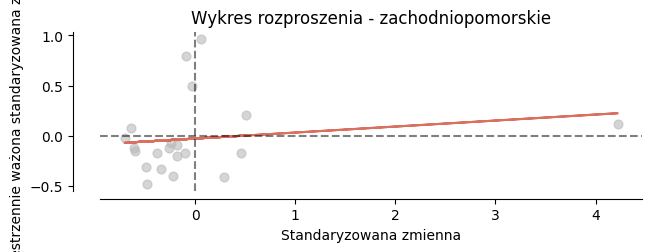

In [ ]:
analiza_zachodniopomorskie = analiza_dla_wojewodztwa(powiaty_zachodniopomorskie, "zachodniopomorskie")

In [ ]:
macierze_zachodniopomorskie = analiza_wojewodztwa_z_tabela(powiaty_zachodniopomorskie, "zachodniopomorskie")

<ipython-input-58-3f5bac77d132>:6: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  "Macierz wag przestrzennych Queen": weights.Queen.from_dataframe(powiaty),
<ipython-input-58-3f5bac77d132>:7: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  "Macierz wag przestrzennych Rook": weights.Rook.from_dataframe(powiaty),


,Macierz wag,Moran I,Moran p-value,Geary C,Geary p-value,Getis-Ord G,Getis-Ord p-value
0,Macierz wag przestrzennych Queen,0.059932,0.065,0.774231,0.143,0.237263,0.190
1,Macierz wag przestrzennych Rook,0.059932,0.080,0.774231,0.165,0.237263,0.204
2,Macierz odległości z progiem,0.008818,0.179,0.999732,0.497,0.247446,0.220
3,Macierz KNN (k=4),-0.024508,0.347,1.085283,0.311,0.218156,0.163
